<a href="https://colab.research.google.com/github/NITHISHREDDYGANTA/newML/blob/main/StudentScorePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json when prompted


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gantanithishreddy","key":"c0b4afc94af8e58eda7409673f22b251"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set file permissions


In [4]:
!kaggle datasets download -d Student Study Hours -Linear Regression


usage: kaggle [-h] [-v] [-W] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...
kaggle: error: unrecognized arguments: Hours -Linear Regression


In [6]:
import os
import zipfile

# Define the ZIP file name (Change this if needed)
zip_path = "student-performance-in-exams.zip"  # Modify if your ZIP name is different

# Extract the ZIP file
with zipfile.ZipFile('/Study hours.zip', 'r') as zip_ref:
    zip_ref.extractall("dataset")  # Extract to a folder

# List all files in the extracted folder
extracted_files = os.listdir("dataset")
print("Extracted Files:", extracted_files)

# Find the full path of the CSV file
for file in extracted_files:
    if file.endswith(".csv"):  # Check if it's a CSV file
        csv_path = os.path.join("dataset", file)
        print("CSV File Path:", csv_path)


Extracted Files: ['score.csv', 'score_updated.csv']
CSV File Path: dataset/score.csv
CSV File Path: dataset/score_updated.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [9]:
# from google.colab import files

# # Upload the CSV file
# uploaded = files.upload()

# Load the dataset (change filename accordingly)
dataset_path = "dataset/score_updated.csv"  # Replace with the actual filename
data = pd.read_csv(dataset_path)

# Display the first few rows
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
# Assuming 'Hours' is the feature and 'Scores' is the target
X = data.iloc[:, :-1].values  # Feature (Hours studied)
y = data.iloc[:, -1].values   # Target (Scores)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
y_pred = model.predict(X_test)


In [34]:
from sklearn.metrics import r2_score

# Compute R² score
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score (Accuracy): {r2 * 100:.2f}%")


Mean Absolute Error: 3.3702236454952397
Mean Squared Error: 17.007444250866516
Root Mean Squared Error: 4.124008274830024
R² Score (Accuracy): 97.09%


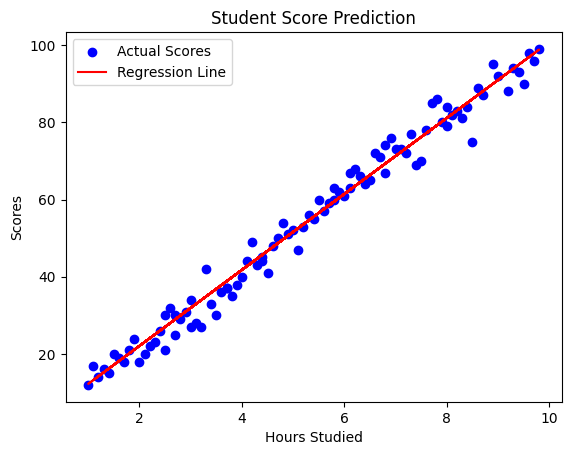

In [20]:
plt.scatter(X, y, color='blue', label='Actual Scores')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.title("Student Score Prediction")
plt.legend()
plt.show()


In [33]:
hours = np.array([[7]])  # Change the value to test with different hours
predicted_score = model.predict(hours)
print(f"Predicted Score for {hours[0][0]} hours of study: {predicted_score[0]}")


Predicted Score for 7 hours of study: 71.29001113677432
